# Sprint 4. Data Wrangling Continuación

## ¡Llena ese carrito!

### Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')

In [3]:
# mostrar información del DataFrame
products =pd.read_csv('/datasets/products.csv',sep=';')

In [4]:
# mostrar información del DataFrame
aisles = pd.read_csv ('/datasets/aisles.csv',sep = ';')

In [5]:
# mostrar información del DataFrame
departments = pd.read_csv('/datasets/departments.csv', sep =';')

In [6]:
# mostrar información del DataFrame
order_products = pd.read_csv('/datasets/order_products.csv', sep =';')


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


**Hallazgos**
Las tablas pertenecen al sector retail, y es fundamental destacar que su análisis será recurrente en este tipo de tiendas. Por ello, es crucial comprender las relaciones que estas tablas tienen dentro de un modelo de datos o entidad-relación, ya que esto facilitará su correcta interpretación y uso en futuros análisis.




# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

**3.1**

**Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).**

In [7]:
orders.dtypes
#Los columnas de ID son numeros enteros en ORDERS

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [8]:
products.dtypes
#Los columnas de ID son numeros enteros en PRODUCTS

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [9]:
aisles.dtypes
#Los columnas de ID son numeros enteros en AISLES

aisle_id     int64
aisle       object
dtype: object

In [10]:
departments.dtypes
#Los columnas de ID son numeros enteros en DEPARTMENTS

department_id     int64
department       object
dtype: object

In [11]:
order_products.dtypes
#Los columnas de ID son numeros enteros en ORDER PRODUCTS

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

**Una vez verificada la naturaleza numérica de las columnas, se procederá a depurar los datos, eliminando valores nulos, vacíos y duplicados para garantizar la integridad de la base de datos.**

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [12]:
# Revisa si hay orders duplicados
orders.duplicated().sum()

15

In [13]:
#¿Qué es lo que tienen en común esas 15 filas?
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los orders que se hicieron el miércoles a las 2:00 a.m.
orders[(orders['order_dow']== 3) & (orders['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

**El día miércoles a las 2 AM de todas las ordenes de compra solo el 12% (15/121) fueron duplicados.**


In [15]:
# Elimina los orders duplicados
orders = orders.drop_duplicates().reset_index(drop = True)


In [16]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()


0

In [17]:
# Vuelve a verificar si hay IDs duplicados de orders
orders.duplicated(subset = 'order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:

**Eliminé los registros duplicados que ocurrieron el día miércoles a las 2 a.m., lo cual es probable que haya sido un error del sistema, ya que no todos los registros de esa hora estaban duplicados. Por último, verifiqué la columna de ID de los pedidos, ya que es la única que no debería contener valores repetidos dentro de la tabla "orders".**

#`products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [19]:
# Verifica si hay IDs duplicadas de productos
products.duplicated(subset = 'product_id').sum()

0

In [20]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
product_name_upper = products['product_name'].str.upper()

In [21]:
#contabilizar los duplicados después de hacer product name a mayúsculas
products.duplicated(subset = 'product_name').sum()

1257

In [22]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(products.duplicated(subset = 'product_name')) & (~products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Todos lo valores faltantes en "product_name" son de valores ausentes. Aunque existan valores con el mismo nombre estos pueden ser diferentes productos siempre y cuando el product_id sea distinto.**

### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [24]:
# Revisa si hay IDs duplicadas de productos
departments.duplicated(subset = 'department_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**No hubo datos ausentes en departments, únicamente son dos campos, el valor junto con su definición.**

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()


0

In [26]:
# Revisa si hay IDs duplicadas de productos
aisles.duplicated(subset = 'aisle_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**No hay datos dupicados en aisles, únicamente son dos campos, el valor junto con su definición.**

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()



0

In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products.duplicated(subset = 'order_id').sum()



4094961

In [29]:
order_products[(order_products['order_id'].duplicated())]

,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Un mismo order_id puede aparecer varias veces si una orden contiene más de un producto. En este caso, cada fila representa un producto diferente dentro de la misma orden. Esto es común en datasets de transacciones, donde cada fila corresponde a un ítem en el pedido.**

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
products.isna().sum()
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente cuáles son tus hallazgos.

**Existen 1258 nombres de producto que se desconocen, sin embargo, si conocemos su ID**.

In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna())& (~products['aisle_id']==100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

**Con la sentencia anterior podemos comprobar que todos los valores ausentes pertenecen al pasillo 100.** 

In [32]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna())& (~products['department_id']==21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

**Todos los valores ausentes en el nombre del producto vienen del departamento 21 así como del pasillo 100.**

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_missing= aisles[(aisles['aisle_id']==100)]
department_missing =departments[(departments['department_id']==21)]

print(aisle_missing)
print()
print(department_missing)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

**Con esto podemos confirmar que el error esta en el departamento 21, pasillo 100.** 

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'

products['product_name'] = products['product_name'].fillna('Unknown').reset_index (drop = True)

In [35]:
#Verificar valores ausentes en 'product_name'
products['product_name'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Llenamos los valores NaN con 'Unknown', es impotante destacar que no se pueden eliminar estos registros debido a que si tienen un 'product_id'.**

### `orders` data frame

In [36]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [37]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

orders[orders['days_since_prior_order'].isna()]['order_number'].unique()

#No, únicamente la compra número 1 representa NaN en 'days_since_prior_order'

array([1])

In [38]:
#llenar los valores nulos en 'days_since_prior_order'
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Se llenaron con "0" los valores nulos ya que representan ningún pedido anterior.**

### `order_products` data frame

In [39]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [40]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

**El campo "add_to_cart_order" deja de después del pedido número 65.**

In [41]:
# Guarda todas las IDs de orders que tengan un valor ausente en 'add_to_cart_order'
missing = order_products[order_products['add_to_cart_order'].isna()]
missing

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [42]:
# ¿Todos los orders con valores ausentes tienen más de 64 productos? 

#Si

In [43]:
# Agrupa todos los orders con datos ausentes por su ID de pedido.
missing_sort = missing.sort_values('order_id')
missing_sort

,order_id,product_id,add_to_cart_order,reordered
2437093,9310,25753,NaN,0
3195573,61355,39972,NaN,0
3941595,61355,17807,NaN,0
2968806,61355,29660,NaN,0
3965219,61355,49325,NaN,0
...,...,...,...,...
3760909,3383594,63,NaN,0
3784932,3383594,49144,NaN,1
2772397,3383594,46710,NaN,0
1537276,3383594,15076,NaN,0


In [44]:
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
ordenes_con_ausentes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [45]:
order_products[order_products ['order_id'].isin(ordenes_con_ausentes)].groupby('order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [46]:
order_products[order_products['order_id']==9310].sort_values('add_to_cart_order').iloc[55:,]

,order_id,product_id,add_to_cart_order,reordered
1897958,9310,30059,56.0,0
3139404,9310,23282,57.0,0
2581604,9310,24456,58.0,0
3845409,9310,204,59.0,1
3857577,9310,21847,60.0,0
854075,9310,33290,61.0,0
3468473,9310,15455,62.0,0
1992474,9310,45002,63.0,0
4432234,9310,21332,64.0,0
2437093,9310,25753,NaN,0


Describe brevemente cuáles son tus hallazgos.

**Como podemos observar todos los id de orders al llegar después del número 64 se marcan como 'NaN ya que la plataforma pierde el registro.**

In [47]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Se asignó el valor 999 a aquellos registros que superan 64, dado que esta información no pudo ser recuperada y, en el contexto de un estudio de consumo, no es relevante analizar posiciones superiores a 64.**

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

**En el proceso de limpieza de datos, se eliminaron los valores duplicados y nulos, lo que permitió obtener dataframes depurados y listos para su análisis.**


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [48]:
#Verificación de valores en order_hour_of_day (0-23)
valores_unicos_hora = orders['order_hour_of_day'].unique()
valores_unicos_hora = sorted(valores_unicos_hora)

In [49]:
#impresión de los valores únicos 
valores_unicos_hora

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [50]:
#Verificación de valores en order_dow (0-6)
valores_unicos_dia = orders['order_dow'].unique()
valores_unicos_dia_ordenados = sorted(valores_unicos_dia)

In [51]:
#impresión de los valores únicos 
valores_unicos_dia_ordenados

[0, 1, 2, 3, 4, 5, 6]

Escribe aquí tus conclusiones

**Pudimos comprobar que las horas en nuestra tabla de ordenes se encuentra en un formato de 24 hrs, así como los días de la semana comienzan por el 0 siendo igual al lunes.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Excelente, has hecho una válidación de los datos, esto es muy importante para evitar posibles erroes que se puedan presentar más adelante.

</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

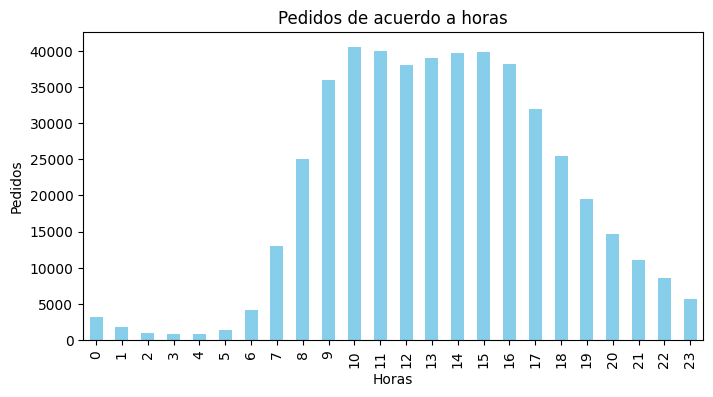

In [52]:
horas_del_dia = orders['order_hour_of_day'].value_counts().sort_index()

horas_del_dia.plot(
    
    kind='bar',  # Cambiar a 'bar' para contar ocurrencias discretas
    color='skyblue',
    figsize=(8, 4),
    title = 'Pedidos de acuerdo a horas',
    xlabel = 'Horas',
    ylabel = 'Pedidos',
    grid = False
)

plt.show()

Escribe aquí tus conclusiones

**Las horas donde se reciben más pedidos es entre las 9am hasta las 5pm.**

### [A3] ¿Qué día de la semana compran víveres las personas?

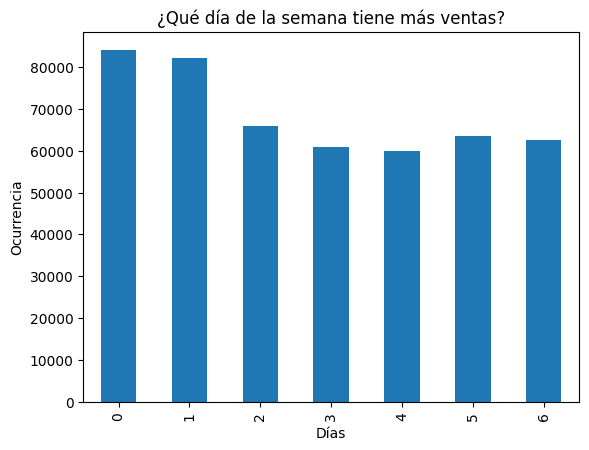

In [53]:
dias_de_la_semana = orders['order_dow'].value_counts().sort_index()

dias_de_la_semana.plot(
    kind = 'bar',
    title = '¿Qué día de la semana tiene más ventas?',
    xlabel = 'Días',
    ylabel = 'Ocurrencia'
)
plt.show()

Escribe aquí tus conclusiones

**Los días donde hay más ventas son los domingos y los lunes**.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

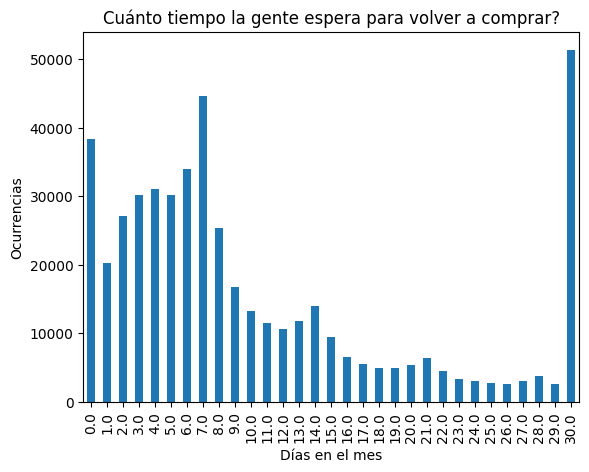

In [54]:
dias_para_ordenar = orders['days_since_prior_order'].value_counts().sort_index()

dias_para_ordenar.plot(
    kind = 'bar',
    title = 'Cuánto tiempo la gente espera para volver a comprar?',
    xlabel = 'Días en el mes',
    ylabel = 'Ocurrencias'
)

plt.show()

Escribe aquí tus conclusiones

**Podemos destacar que contamos con 3 diferentes públicos:**

**1. Aquellos que compran mensualmente.**

**2. Aquellos que compran semanalmente.**

**3. Aquellos que nunca han comprado antes.**

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [55]:
miercoles = orders[orders['order_dow'] == 2]
sabado = orders[orders['order_dow'] == 5]

In [56]:
# Contar pedidos por hora del día
conteo_miercoles = miercoles['order_hour_of_day'].value_counts().sort_index()
conteo_sabado = sabado['order_hour_of_day'].value_counts().sort_index()

In [57]:
# Crear un DataFrame para facilitar la comparación
df_comparacion = pd.DataFrame({
    'Miércoles': conteo_miercoles,
    'Sábado': conteo_sabado
}).fillna(0)  # Rellenar NaN con 0 para horas sin pedidos

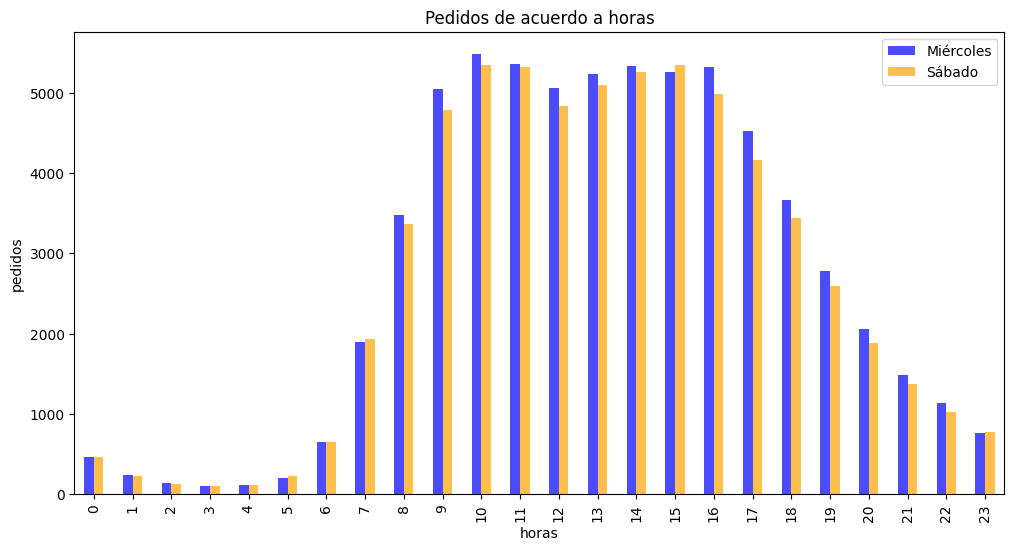

In [58]:
# Crear el gráfico de barras usando .plot()
df_comparacion.plot(
    kind='bar',
    figsize=(12, 6),
    color=['blue', 'orange'],
    alpha=(0.7),
    title = 'Pedidos de acuerdo a horas',
    xlabel = 'horas',
    ylabel = 'pedidos'
)

plt.show()

Escribe aquí tus conclusiones

**En su mayoría el miércoles tuvo mayores ventas en las horas pico (9am - 5pm).**

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [59]:
conteo_pedidos = orders.groupby('user_id')['order_id'].count()

In [60]:
# Contar cuántos clientes hicieron 1, 2, 3, ... pedidos
conteo_clientes = conteo_pedidos.value_counts().sort_index()

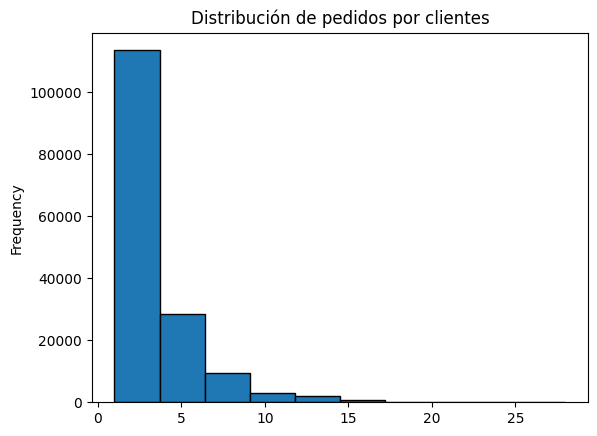

In [77]:
# Crear el gráfico
conteo_pedidos.plot(
    
    kind='hist',
    edgecolor='black',
    title = 'Distribución de pedidos por clientes',
    xlabel = 'Pedidos',
    ylabel = 'Frecuencia',
    

)

plt.show()

Escribe aquí tus conclusiones

**La mayoría de las personas ordenan de 1 a 19 productos.**

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [62]:
fct_ordenes_productos = order_products.merge(products, on = 'product_id')

In [63]:
best_products = fct_ordenes_productos.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False)

In [64]:
best_products_20 = best_products.head(20)

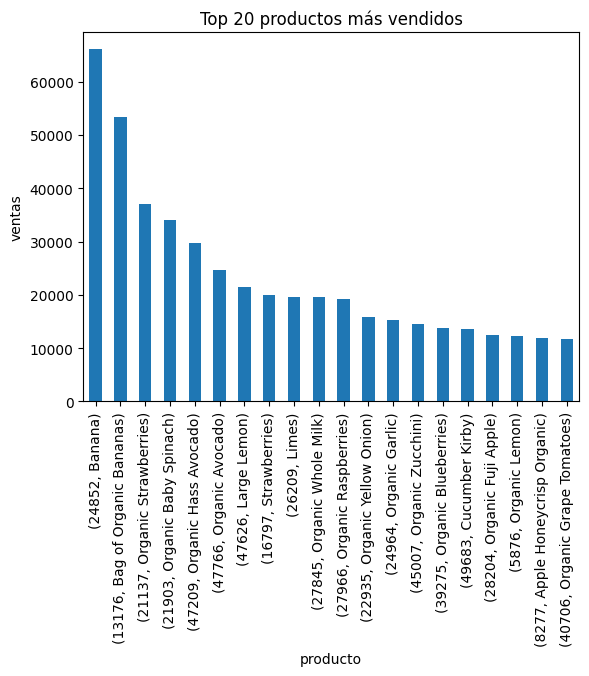

In [65]:
best_products_20.plot(
    kind = 'bar',
    title = 'Top 20 productos más vendidos',
    xlabel = 'producto',
    ylabel = 'ventas'
)

plt.show()

Escribe aquí tus conclusiones

**Los 20 productos más vendidos en su mayoría son frutas y productos orgánicos.**

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [66]:
order_segment = order_products.groupby('order_id')['product_id'].count()

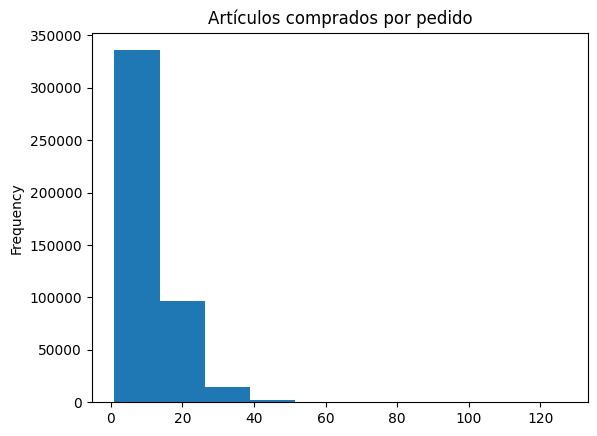

In [79]:
order_segment.plot(
    kind = 'hist',
    title = 'Artículos comprados por pedido',
    xlabel = 'Pedidos',
    ylabel = 'Ocurrencias',
    
)

plt.show()

Escribe aquí tus conclusiones

**La mayoría de nuestros pedidos se encuentran entre 1 y 25.** 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [68]:
Mejores_productos_reordenados =fct_ordenes_productos[fct_ordenes_productos['reordered']==1].groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False)

In [69]:
Mejores_20_productos_reordenados = Mejores_productos_reordenados.head(20)


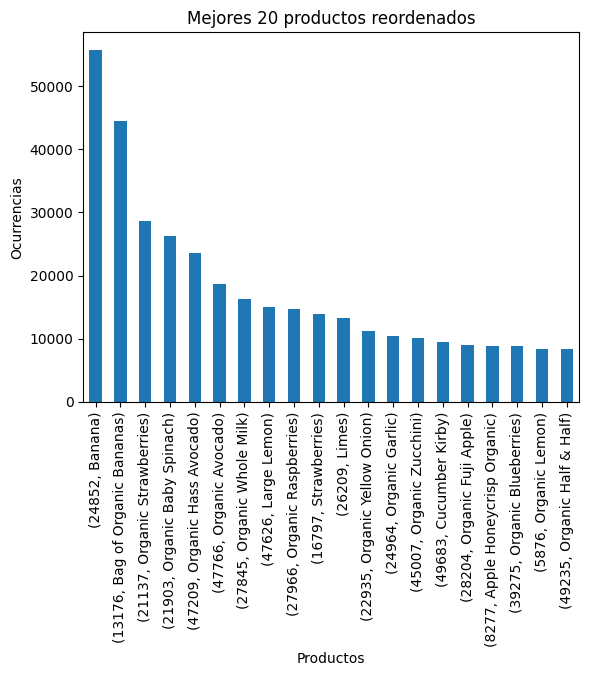

In [70]:
Mejores_20_productos_reordenados.plot(
    kind='bar',
    title = 'Mejores 20 productos reordenados',
    ylabel = 'Ocurrencias',
    xlabel = 'Productos')

plt.show()

Escribe aquí tus conclusiones

**Los productos con mayor número de reordenamientos son en gran medida similares a los más vendidos. No obstante, observamos el primer cambio en el caso de la leche, que reemplaza al limón. Este último, aunque sigue siendo un producto de alta demanda, ha sido superado en reordenamientos por la leche**.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [71]:
fct_ordenes_productos.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones

**Con estos datos, podemos identificar productos con alta demanda entre nuevos consumidores, así como aquellos que generan ingresos principalmente a través de reórdenes. Esta información es fundamental para diseñar estrategias de marketing focalizadas y efectivas.**

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [72]:
fct_ordenes_productos_user =fct_ordenes_productos.merge(orders, on = 'order_id')

In [73]:
fct_ordenes_productos_user.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

**El análisis de la tasa de reordenamiento nos permite cuantificar la fidelidad de nuestros clientes y personalizar nuestras estrategias. Al identificar los productos más recurrentes en sus compras, podemos ofrecer promociones y recomendaciones altamente relevantes.**

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
# Filtrar para obtener solo el primer producto agregado al carrito por cada usuario
primer_producto_por_usuario = fct_ordenes_productos[fct_ordenes_productos['add_to_cart_order'] == 1]

# Contar cuántas veces fue agregado cada producto primero
conteo_productos = primer_producto_por_usuario.groupby(['product_id', 'product_name'])['order_id'].count()

# Ordenar por la frecuencia en orden descendente y mostrar los 20 principales productos
top_20_productos = conteo_productos.sort_values(ascending=False).head(20)

# Mostrar los resultados
print(top_20_productos)


product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Escribe aquí tus conclusiones

**Podemos observar que los productos agregados en primer lugar al carrito, como el plátano, la leche, las fresas y el aguacate, también se encuentran entre los más vendidos. Esta información puede ser útil para que el retail optimice su inventario y ajuste el surtido de productos, asegurando que los artículos más demandados estén siempre disponibles.**

----

### Conclusion general del proyecto:

**En este proyecto, analizamos las ventas de un retail, realizando cruces de información para obtener una mayor granularidad en los datos. A lo largo del análisis, identificamos que los productos más vendidos incluyen el plátano, las espinacas, el aguacate, la leche y el limón. Además, resaltamos la importancia de evaluar los pedidos según el horario en que se realizan, la cantidad de productos por orden y la proporción de reordenamientos. Estos insights son clave para desarrollar estrategias efectivas de marketing y logística, optimizando la cadena de suministro y asegurando que los productos preferidos por los clientes estén siempre disponibles, con promociones personalizadas que no encontrarían en otra tienda, aprovechando el conocimiento de sus preferencias.**

------